In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ec524-heart-disease/test.csv
/kaggle/input/ec524-heart-disease/train.csv


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [4]:
url="../input/ec524-heart-disease/train.csv"
heart_df= pd.read_csv(url)
heart_df.head()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               228 non-null    int64  
 1   age              228 non-null    int64  
 2   sex              228 non-null    int64  
 3   chest_pain       228 non-null    int64  
 4   resting_bp       228 non-null    int64  
 5   cholestoral      228 non-null    int64  
 6   high_sugar       228 non-null    int64  
 7   ecg              228 non-null    int64  
 8   max_rate         228 non-null    int64  
 9   exercise_angina  228 non-null    int64  
 10  st_depression    228 non-null    float64
 11  slope            228 non-null    int64  
 12  vessels          224 non-null    float64
 13  thalium_scan     226 non-null    float64
 14  heart_disease    228 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 26.8 KB


### Data Preprocessing

In [6]:
heart_df.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            4
thalium_scan       2
heart_disease      0
dtype: int64

In [7]:
heart_df['vessels']=heart_df['vessels'].fillna(heart_df['vessels'].median())

In [8]:
heart_df['thalium_scan']=heart_df['thalium_scan'].fillna(heart_df['thalium_scan'].median())

In [9]:
heart_df.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            0
thalium_scan       0
heart_disease      0
dtype: int64

### Exploratory data analysis

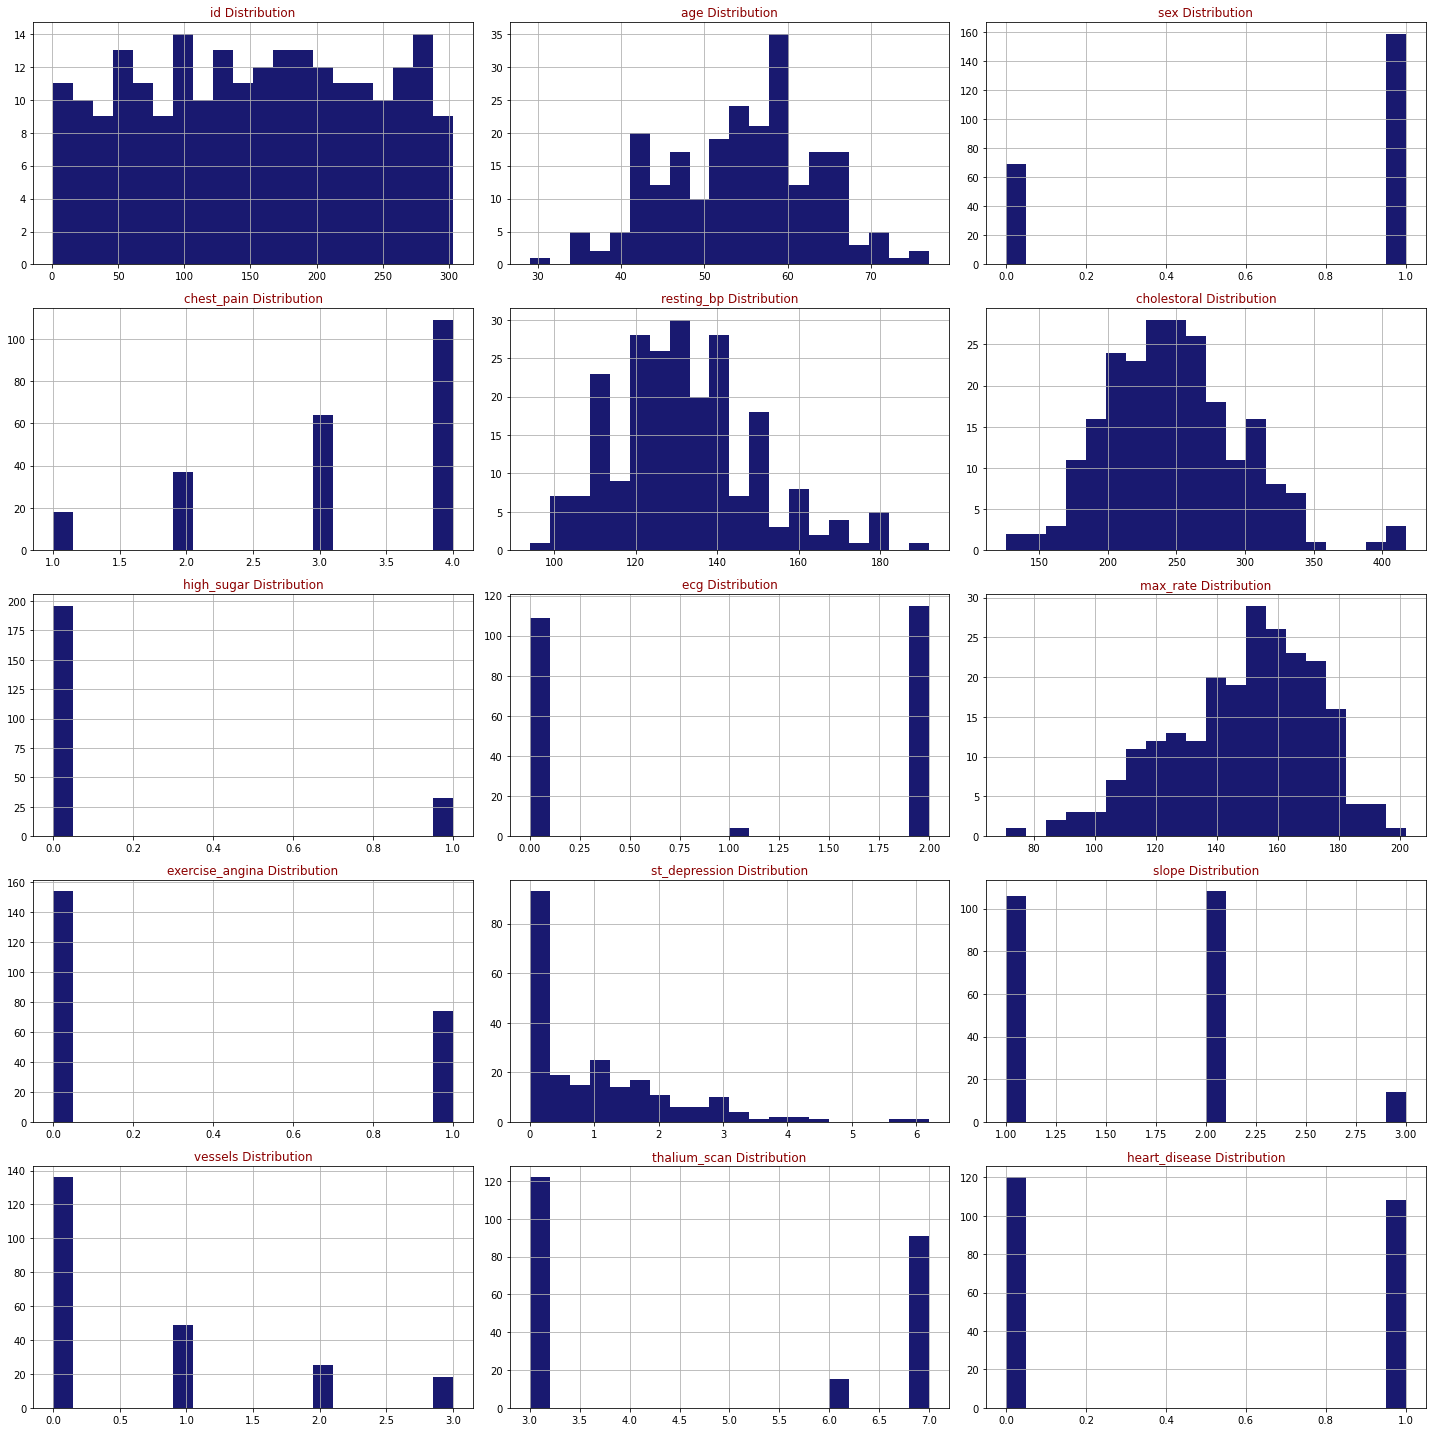

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,5,3)

In [11]:
heart_df.heart_disease.value_counts()

0    120
1    108
Name: heart_disease, dtype: int64

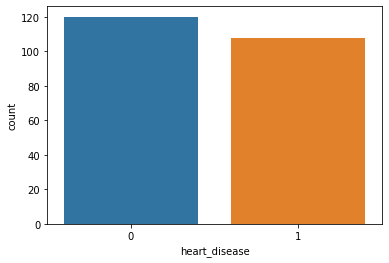

In [12]:
sn.countplot(x='heart_disease',data=heart_df)

In [13]:
heart_df.describe()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,153.600877,54.368421,0.697368,3.157895,131.982456,248.337719,0.140351,1.026316,148.675439,0.324561,1.010526,1.596491,0.671053,4.793860,0.473684
std,85.501492,9.003928,0.460408,0.967115,17.827852,49.388909,0.348115,0.993020,23.969693,0.469241,1.146215,0.604233,0.957992,1.943374,0.500406
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,81.500000,48.000000,0.000000,3.000000,120.000000,212.750000,0.000000,0.000000,131.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,155.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.250000,60.250000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Data Splitting

In [14]:
import sklearn
x=heart_df.iloc[:,:-1]
y=heart_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=25)

## Model building

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model Evaluation

#### Model accuracy

In [16]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8913043478260869

### Performance of a Logistic model

#### Confusion matrix

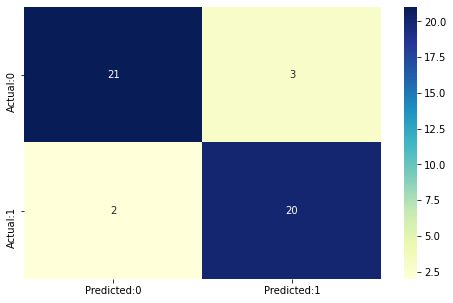

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [18]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [19]:
print('The acuuracy of the model  = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification =  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate  = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate  = ',TN/float(TN+FP),'\n',
'Positive Predictive value  = ',TP/float(TP+FP),'\n',
'Negative predictive Value  = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = ',(1-sensitivity)/specificity)


The acuuracy of the model  =  0.8913043478260869 
 The Missclassification =   0.10869565217391308 
 Sensitivity or True Positive Rate  =  0.9090909090909091 
 Specificity or True Negative Rate  =  0.875 
 Positive Predictive value  =  0.8695652173913043 
 Negative predictive Value  =  0.9130434782608695 
 Positive Likelihood Ratio =  7.2727272727272725 
 Negative likelihood Ratio =  0.10389610389610393


In [20]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.014427,0.985573
1,0.038089,0.961911
2,0.651244,0.348756
3,0.963982,0.036018
4,0.106257,0.893743


### Lower the threshold

In [21]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[10 14]
 [ 0 22]] 
 with 32 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.4166666666666667 



With 0.2 threshold the Confusion Matrix is  
 [[12 12]
 [ 1 21]] 
 with 33 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9545454545454546 Specificity:  0.5 



With 0.3 threshold the Confusion Matrix is  
 [[15  9]
 [ 2 20]] 
 with 35 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9090909090909091 Specificity:  0.625 



With 0.4 threshold the Confusion Matrix is  
 [[17  7]
 [ 2 20]] 
 with 37 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9090909090909091 Specificity:  0.7083333333333334 





/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Processing test data

In [22]:
test=pd.read_csv('../input/ec524-heart-disease/test.csv')
test.head()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan
0,179,43,1,3,130,315,0,0,162,0,1.9,1,1,3
1,14,44,1,2,120,263,0,0,173,0,0.0,1,0,7
2,195,68,0,3,120,211,0,2,115,0,1.5,2,0,3
3,118,35,0,4,138,183,0,0,182,0,1.4,1,0,3
4,299,45,1,1,110,264,0,0,132,0,1.2,2,0,7


In [23]:
test.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            0
thalium_scan       0
dtype: int64

### Taking Predictions

In [24]:
pred=logreg.predict(test)

In [26]:
output=pd.DataFrame({'id':test.id,'heart_disease':pred})
output.to_csv("Output.csv",index=False)

AttributeError: 'DataFrame' object has no attribute 'Id'